# beta estimation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### tcpnewreno

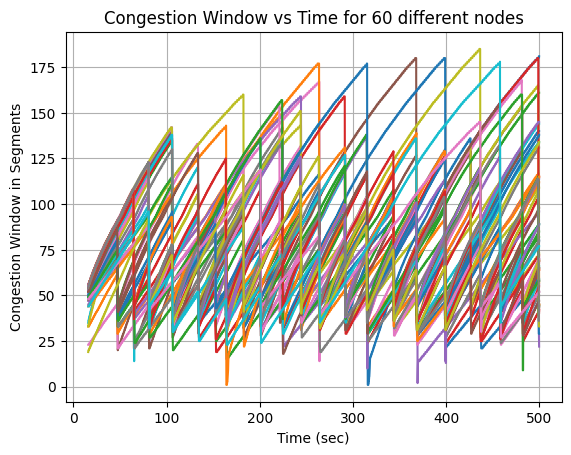

In [2]:
os.chdir('tcp-dumbbell-regular-tcpnewreno/')

for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        # print()
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

## tcplinuxreno

In [3]:
# Variables
folder_path = '/home/jack/github/mtp/pythonWork/tcp-dumbbell-regular-tcplinuxreno/'

### PoC

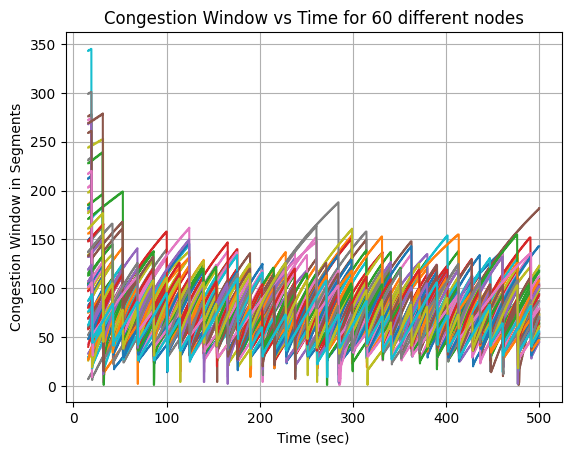

In [4]:
os.chdir(folder_path)
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

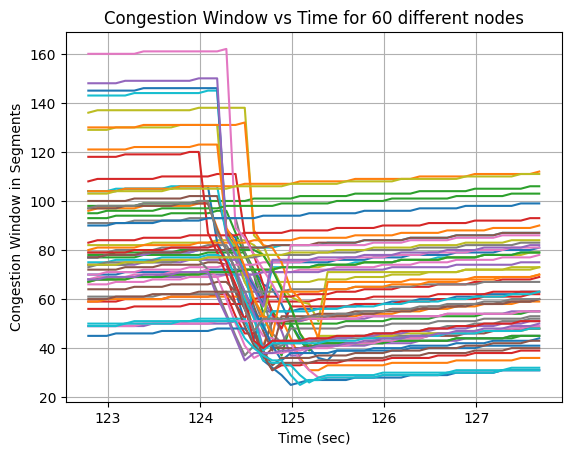

In [5]:
os.chdir(folder_path)
data_to_n = []
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        li = 1070
        hi = 1120
        data_to_n.append(d[li:hi, 1])
        plt.plot(d[li:hi, 0], d[li:hi, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

In [6]:
data_to_n = np.array(data_to_n)
data_to_n

array([[70., 70., 70., ..., 41., 41., 41.],
       [96., 97., 97., ..., 59., 59., 59.],
       [93., 93., 93., ..., 54., 55., 55.],
       ...,
       [97., 98., 98., ..., 60., 60., 60.],
       [74., 74., 74., ..., 84., 84., 84.],
       [49., 49., 49., ..., 31., 31., 31.]], shape=(60, 50))

In [7]:
data_loss = np.zeros(data_to_n.shape)

# convert it into loss events
for i in range(len(data_to_n)):
    for j in range(1, len(data_to_n[i])):
        if(data_to_n[i][j-1] > data_to_n[i][j]):
            data_loss[i][j] = 1

In [8]:
# global sync
nij = 0
flows_that_are_lossing = []
for i in range(len(data_loss)):
    for j in range(len(data_loss[i])):
        if(data_loss[i][j] == 1):
            flows_that_are_lossing.append(i)
            nij+=1
            break
sync_rate = nij/len(data_loss)
sync_rate

0.6666666666666666

In [9]:
loss_data = []
for i in flows_that_are_lossing:
    loss_data.append(data_to_n[i])
loss_data = np.array(loss_data)
loss_data

array([[70., 70., 70., ..., 41., 41., 41.],
       [96., 97., 97., ..., 59., 59., 59.],
       [93., 93., 93., ..., 54., 55., 55.],
       ...,
       [60., 60., 60., ..., 40., 40., 40.],
       [97., 98., 98., ..., 60., 60., 60.],
       [49., 49., 49., ..., 31., 31., 31.]], shape=(40, 50))

In [10]:
w_star = []
for i in range(len(loss_data[0])):
    w = 0
    for j in range(len(loss_data)):
        w += loss_data[j][i]
    w_star.append(w/len(loss_data))
w_star = np.array(w_star)
w_star

array([89.875, 90.025, 90.1  , 90.325, 90.55 , 90.775, 90.975, 91.05 ,
       91.2  , 91.375, 91.55 , 91.675, 91.9  , 91.15 , 89.15 , 79.925,
       73.475, 66.1  , 57.525, 51.85 , 50.95 , 50.   , 49.75 , 48.275,
       47.625, 47.575, 48.85 , 49.15 , 49.3  , 49.6  , 49.775, 49.95 ,
       50.175, 50.5  , 50.75 , 51.   , 51.1  , 51.375, 51.575, 51.8  ,
       52.1  , 52.3  , 52.55 , 52.85 , 52.925, 53.2  , 53.45 , 53.65 ,
       53.9  , 54.15 ])

In [11]:
# first loss events
fr = 0
for i in range(1, len(w_star)):
    if(w_star[i] < w_star[i-1]):
        fr = w_star[i]
        break

In [12]:
fr

np.float64(91.15)

In [13]:
# last loss events
lt = 0
for i in range(len(w_star)-1, 0, -1):
    if(w_star[i] < w_star[i-1]):
        lt = w_star[i]
        break
        

In [14]:
lt

np.float64(47.575)

In [15]:
beta = (fr-lt)/fr
beta

np.float64(0.4780581459133297)

as we see this beta value is close to 0.5

## Across whole data

In [16]:
# variables
window_size = 25 # left 25 and right 25 => total 50 i.e 5 seconds


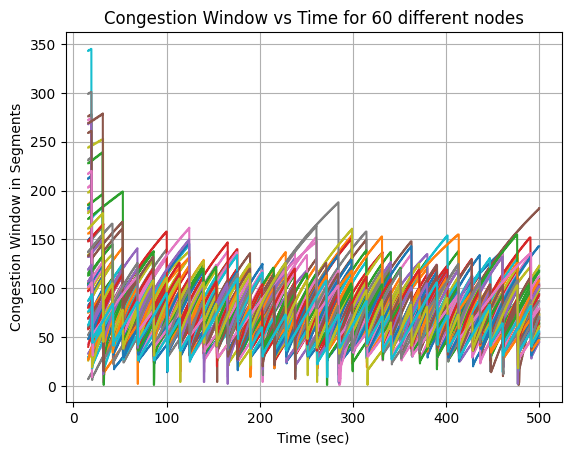

In [17]:
os.chdir(folder_path)
data_to_n = []
for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f, delimiter=8).reshape(-1, 2)
        data_to_n.append(d[:, 1])
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()

In [18]:
data_to_n = np.array(data_to_n)
data_to_n

array([[ 82.,  83.,  83., ...,  73.,  73.,  74.],
       [186., 186., 186., ...,  69.,  69.,  70.],
       [115., 116., 116., ...,  47.,  47.,  48.],
       ...,
       [137., 137., 137., ...,  70.,  70.,  71.],
       [161., 161., 161., ...,  61.,  61.,  61.],
       [ 87.,  87.,  88., ...,  56.,  56.,  56.]], shape=(60, 4843))

In [19]:
data_loss = np.zeros(data_to_n.shape)

# convert it into loss events
for i in range(len(data_to_n)):
    for j in range(1, len(data_to_n[i])):
        if(data_to_n[i][j-1] > data_to_n[i][j]):
            data_loss[i][j] = 1

In [20]:
# global sync
sync_rate = []
for k in range(len(data_loss[0])):
    nij = 0
    low = max(0, k-window_size)
    high = min(k+window_size+1, len(data_loss[0]))
    for i in range(len(data_loss)):
        for j in range(low, high):
            if(data_loss[i][j] == 1):
                nij+=1
                break
    sync_rate.append(nij/len(data_loss))

<StemContainer object of 3 artists>

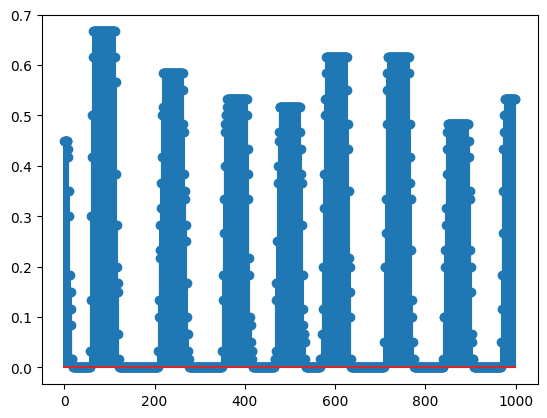

In [21]:
plt.stem(sync_rate[1000:2000])

<StemContainer object of 3 artists>

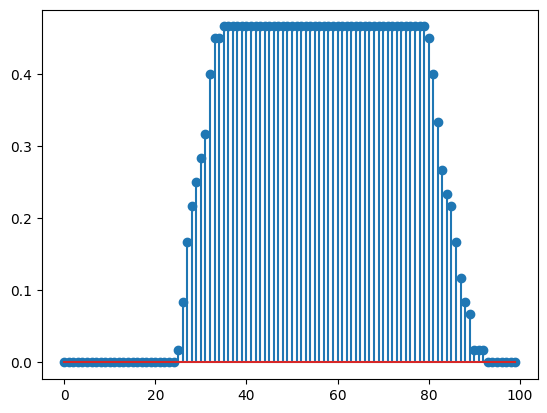

In [22]:
plt.stem(sync_rate[210:310])

let's say whenever sync rate is higher than 0.5 i am going go calculate beta
some problems
- how to find min and max points in a sliding window situation
- maybe for each flow calculate beta separately and average them

In [23]:
betas = []
for i in range(len(sync_rate)):
    sync = sync_rate[i]
    if(sync == 0):
        betas.append(0)
    else:
        # finding window
        low = max(0, i-window_size)
        high = min(i+window_size+1, len(data_loss[0]))

        # store only those flow numbers that are lossing packets
        flows_that_are_lossing = []
        
        for f in range(len(data_loss)):
            for j in range(low, high):
                if(data_loss[f][j] == 1):
                    flows_that_are_lossing.append(f)
                    break
        if(not flows_that_are_lossing):
            betas.append(0)
            continue;
        # extract the data
        loss_data = []
        for ff in flows_that_are_lossing:
            loss_data.append(data_to_n[ff][low:high])
        loss_data = np.array(loss_data)
        # calculate w* for those who are suffering loss
        w_star = np.average(loss_data, axis = 0)
        w_star = np.array(w_star)
        # first loss events
        fr = 0
        for i in range(1, len(w_star)):
            if(w_star[i] < w_star[i-1]):
                fr = w_star[i]
                break
        # last loss events
        lt = 0
        for i in range(len(w_star)-1, 0, -1):
            if(w_star[i] < w_star[i-1]):
                lt = w_star[i]
                break
        if(fr == 0):
            betas.append(0)
        else:
            beta = (fr-lt)/fr
            betas.append(beta)
        

<StemContainer object of 3 artists>

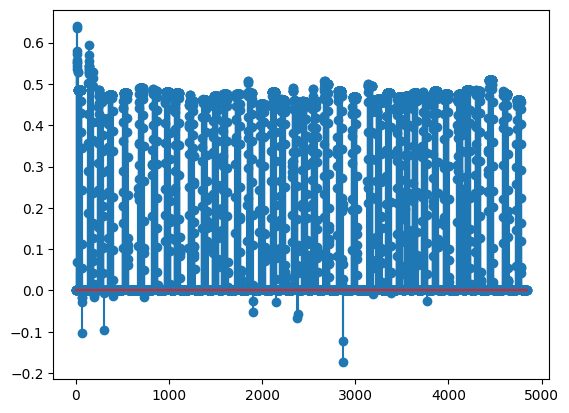

In [24]:
plt.stem(betas)

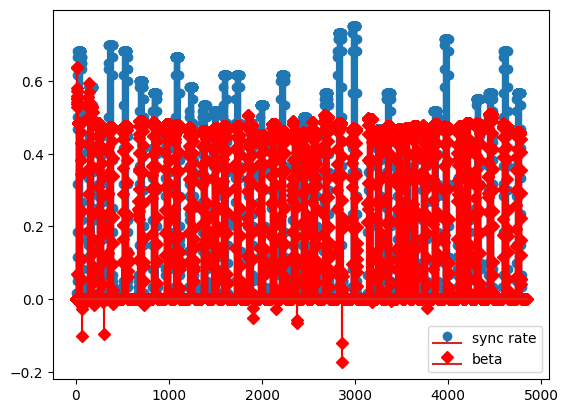

In [28]:
plt.stem(sync_rate, label='sync rate')
plt.stem(betas, linefmt='red', markerfmt='D', label='beta')
plt.legend()

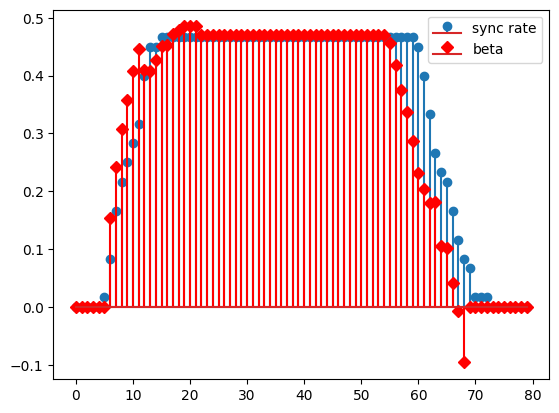

In [29]:
plt.stem(sync_rate[230:310], label='sync rate')
plt.stem(betas[230:310], linefmt='red', markerfmt='D', label='beta')
plt.legend()

## TODO:
- negative beta values?